In [22]:
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [23]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [24]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'archive',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

images_dataset

Found 4000 files belonging to 8 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
class_names=images_dataset.class_names
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [26]:
len(images_dataset)

125

In [27]:
#exploring the dataset
for image_batch, label_batch inn images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

SyntaxError: invalid syntax (2507199619.py, line 2)

In [28]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[215.      220.      239.     ]
  [215.90625 220.90625 239.90625]
  [216.      221.      240.     ]
  ...
  [152.03906 158.03906 144.03906]
  [144.02344 150.02344 136.02344]
  [129.75    135.75    121.75   ]]

 [[215.      220.      239.     ]
  [215.5664  220.5664  239.5664 ]
  [215.9414  220.9414  239.9414 ]
  ...
  [158.15625 164.47266 149.83984]
  [158.3086  164.3086  150.3086 ]
  [151.625   157.625   143.625  ]]

 [[215.      220.      239.     ]
  [215.      220.      239.     ]
  [215.3164  220.3164  239.3164 ]
  ...
  [164.64062 171.58203 155.69922]
  [162.15625 168.78125 153.53125]
  [150.375   157.      141.75   ]]

 ...

 [[198.375   201.375   220.375  ]
  [198.375   201.375   220.375  ]
  [198.90234 201.90234 220.90234]
  ...
  [225.      229.      241.     ]
  [224.8125  228.8125  240.8125 ]
  [223.      227.      239.     ]]

 [[199.      202.      221.     ]
  [199.      202.      221.     ]
  [199.52734 202.52734 221.52734]
  ...
  [224.375   228.375   240.375  ]
  [2

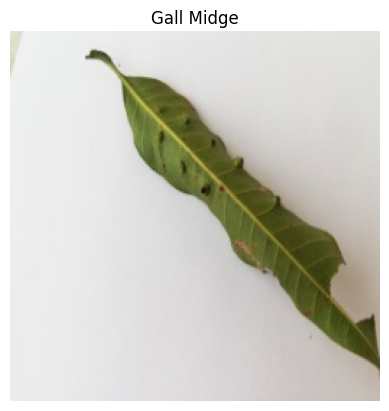

In [29]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

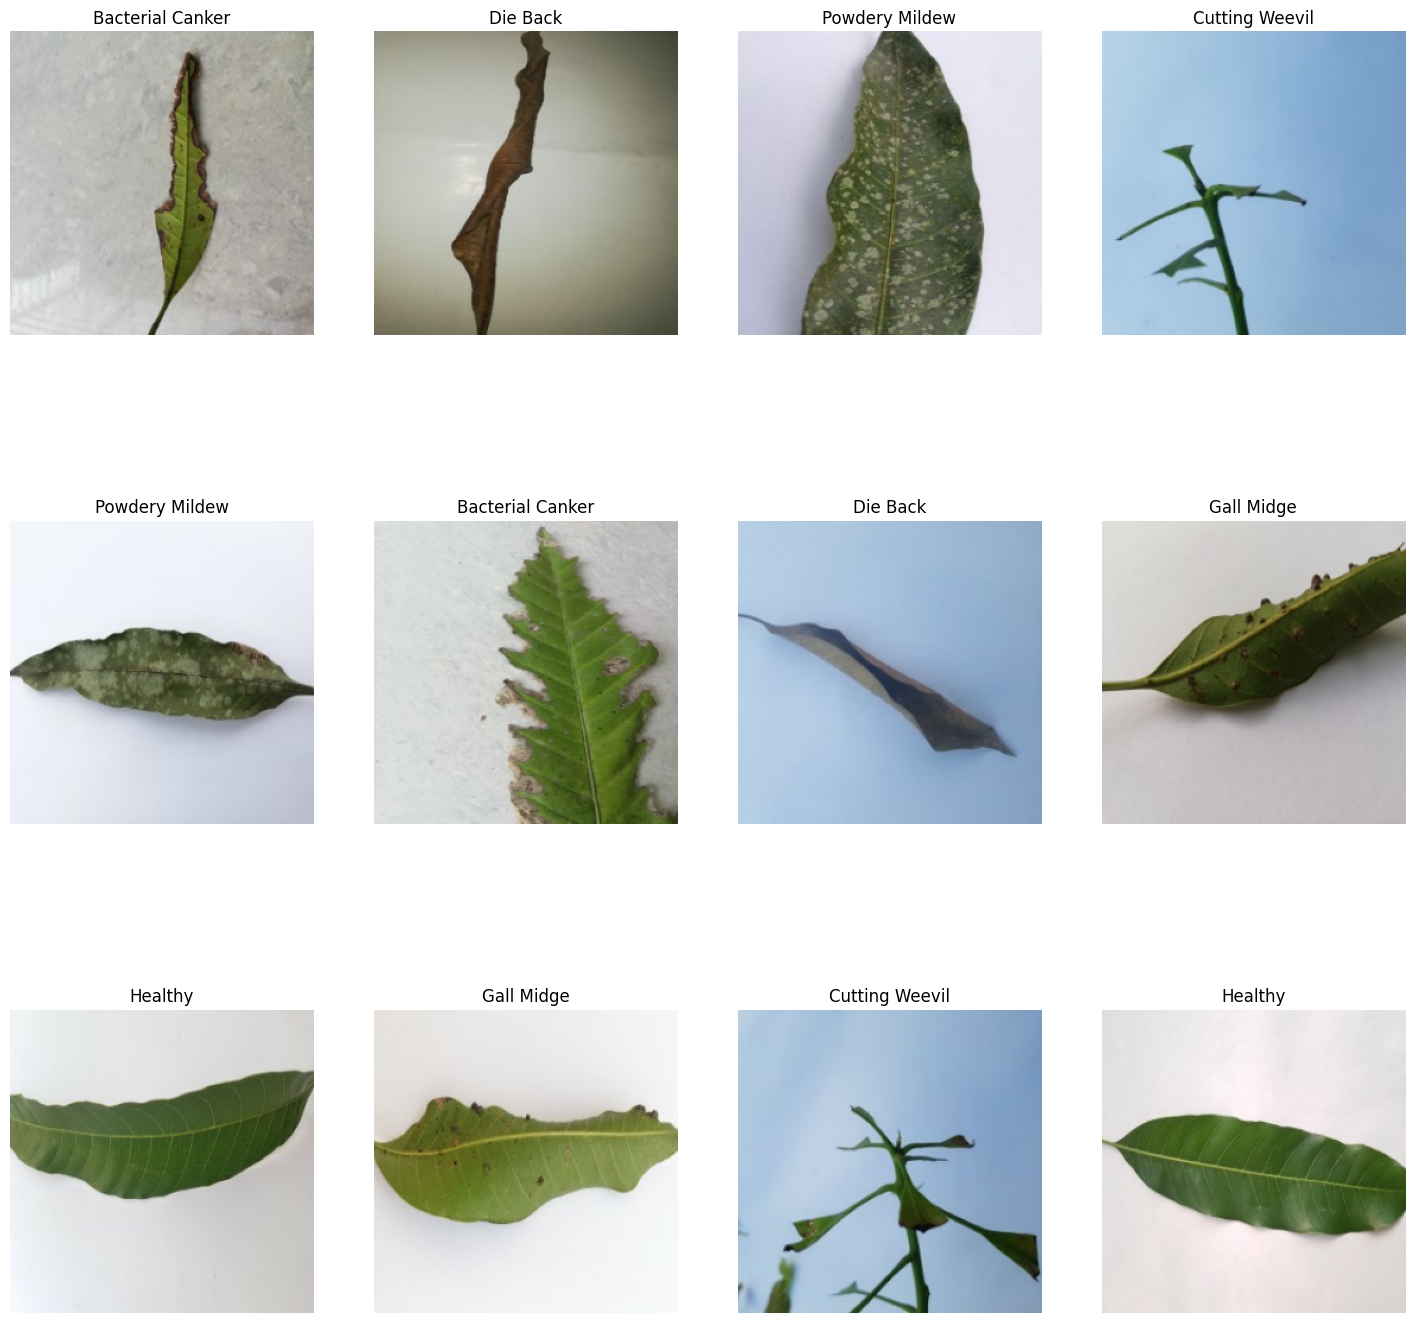

In [30]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [31]:
len(images_dataset)

125

In [32]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [34]:
print(len(train_ds),len(val_ds),len(test_ds))

100 12 13


In [35]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [36]:
resize_and_rescale=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [37]:
data_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [38]:
#bulding the model
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=8
model=models.Sequential ( [
resize_and_rescale,
data_augmentation,
layers. Conv2D(32, (3, 3), activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers. Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers. Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers. Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers. Flatten(), 
layers.Dense (64, activation='relu'),
layers. Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [40]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
#train the model
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/50
100/100 [==============================] - 127s 1s/step - loss: 1.7249 - accuracy: 0.2822 - val_loss: 1.4619 - val_accuracy: 0.3438
Epoch 2/50
100/100 [==============================] - 132s 1s/step - loss: 1.3439 - accuracy: 0.4522 - val_loss: 1.1934 - val_accuracy: 0.5234
Epoch 3/50
100/100 [==============================] - 150s 1s/step - loss: 0.9905 - accuracy: 0.6253 - val_loss: 0.9171 - val_accuracy: 0.6562
Epoch 4/50
100/100 [==============================] - 165s 2s/step - loss: 0.7606 - accuracy: 0.7169 - val_loss: 0.5391 - val_accuracy: 0.7734
Epoch 5/50
100/100 [==============================] - 164s 2s/step - loss: 0.5631 - accuracy: 0.7922 - val_loss: 0.4901 - val_accuracy: 0.8125
Epoch 6/50
100/100 [==============================] - 167s 2s/step - loss: 0.5092 - accuracy: 0.8138 - val_loss: 0.5413 - val_accuracy: 0.7786
Epoch 7/50
100/100 [==============================] - 164s 2s/step - loss: 0.4620 - accuracy: 0.8347 - val_loss: 0.4227 - val_accuracy: 0.8385

In [42]:
#evaluate the model
scores=model.evaluate(test_ds)

13/13 [==============================] - 7s 300ms/step - loss: 0.0604 - accuracy: 0.9784


In [43]:
scores

[0.060379642993211746, 0.9783653616905212]

In [44]:
history

In [45]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 100}


In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [49]:
history.history['accuracy']

[0.28218749165534973,
 0.45218750834465027,
 0.6253125071525574,
 0.7168750166893005,
 0.792187511920929,
 0.8137500286102295,
 0.8346874713897705,
 0.8878124952316284,
 0.8581249713897705,
 0.8987500071525574,
 0.875,
 0.9046875238418579,
 0.9137499928474426,
 0.8990625143051147,
 0.9237499833106995,
 0.9200000166893005,
 0.9334375262260437,
 0.9331250190734863,
 0.9356250166893005,
 0.9418749809265137,
 0.948437511920929,
 0.9434375166893005,
 0.9362499713897705,
 0.9568750262260437,
 0.9515625238418579,
 0.9509375095367432,
 0.9646875262260437,
 0.9468749761581421,
 0.9537500143051147,
 0.9543750286102295,
 0.9537500143051147,
 0.9684374928474426,
 0.9312499761581421,
 0.9659374952316284,
 0.9593750238418579,
 0.9659374952316284,
 0.9556249976158142,
 0.965624988079071,
 0.9771875143051147,
 0.9674999713897705,
 0.9737499952316284,
 0.9787499904632568,
 0.9743750095367432,
 0.9703124761581421,
 0.9590625166893005,
 0.9615625143051147,
 0.9803125262260437,
 0.9737499952316284,
 0.981

In [50]:
len(history.history['accuracy'])

50

In [52]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

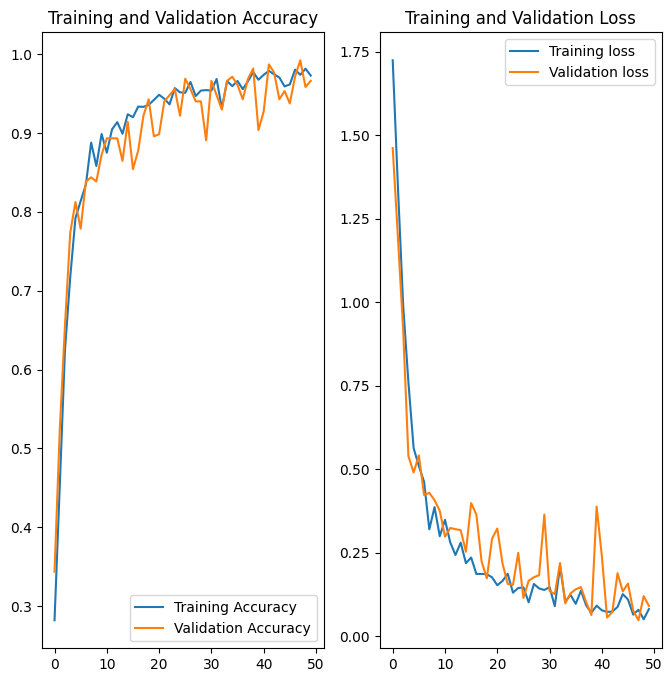

In [54]:
#Plotting Accuracy and Loss Graph for Trained Model using Matplotlib with History Callback
#ploting training and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot (1,2,1)
plt.plot(range (EPOCHS), acc, label='Training Accuracy')
plt.plot(range (EPOCHS), val_acc, label='Validation Accuracy')
plt.legend (loc='lower right')
plt.title('Training and Validation Accuracy')


#ploting training and validation Loss.
plt.subplot (1,2,2)
plt.plot(range (EPOCHS), loss, label='Training loss')
plt.plot(range (EPOCHS), val_loss, label='Validation loss')
plt.legend (loc='upper right')
plt.title('Training and Validation Loss')

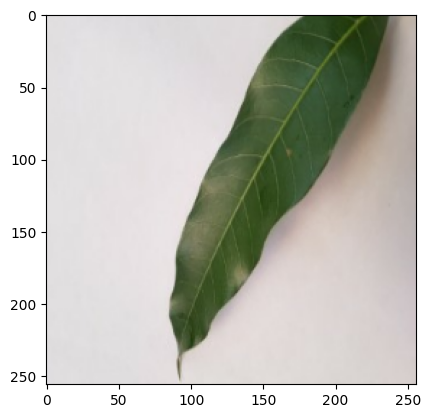

In [57]:
#making predictions
for images_batch, label_batch in test_ds.take (1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

predicting the first image
image1 True Label:  Die Back
1/1 [==============================] - 1s 615ms/step
Image1's predicted label:  Die Back


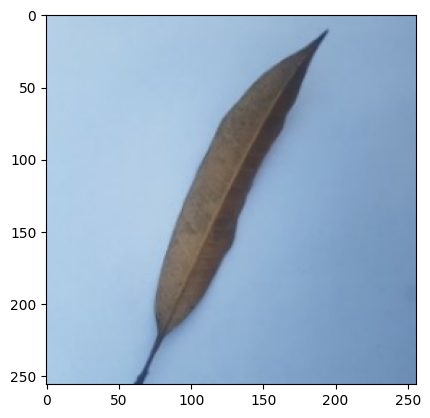

In [63]:
#making predictions
for images_batch, label_batch in test_ds.take (1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()
    
    print("predicting the first image")
    plt.imshow(image1)
    print('image1 True Label: ',class_names[label1])
    
    batch_prediction= model.predict(images_batch)
    print("Image1's predicted label: ", class_names [np.argmax (batch_prediction [0])])

In [64]:
#function to predict with confidence
def predict (model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images [i].numpy())
    img_array=tf.expand_dims (img_array,0)
    predictions=model.predict (img_array)
    predicted_class=class_names [np.argmax(predictions[0])]
    confidence=round (100* (np.max (predictions [0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


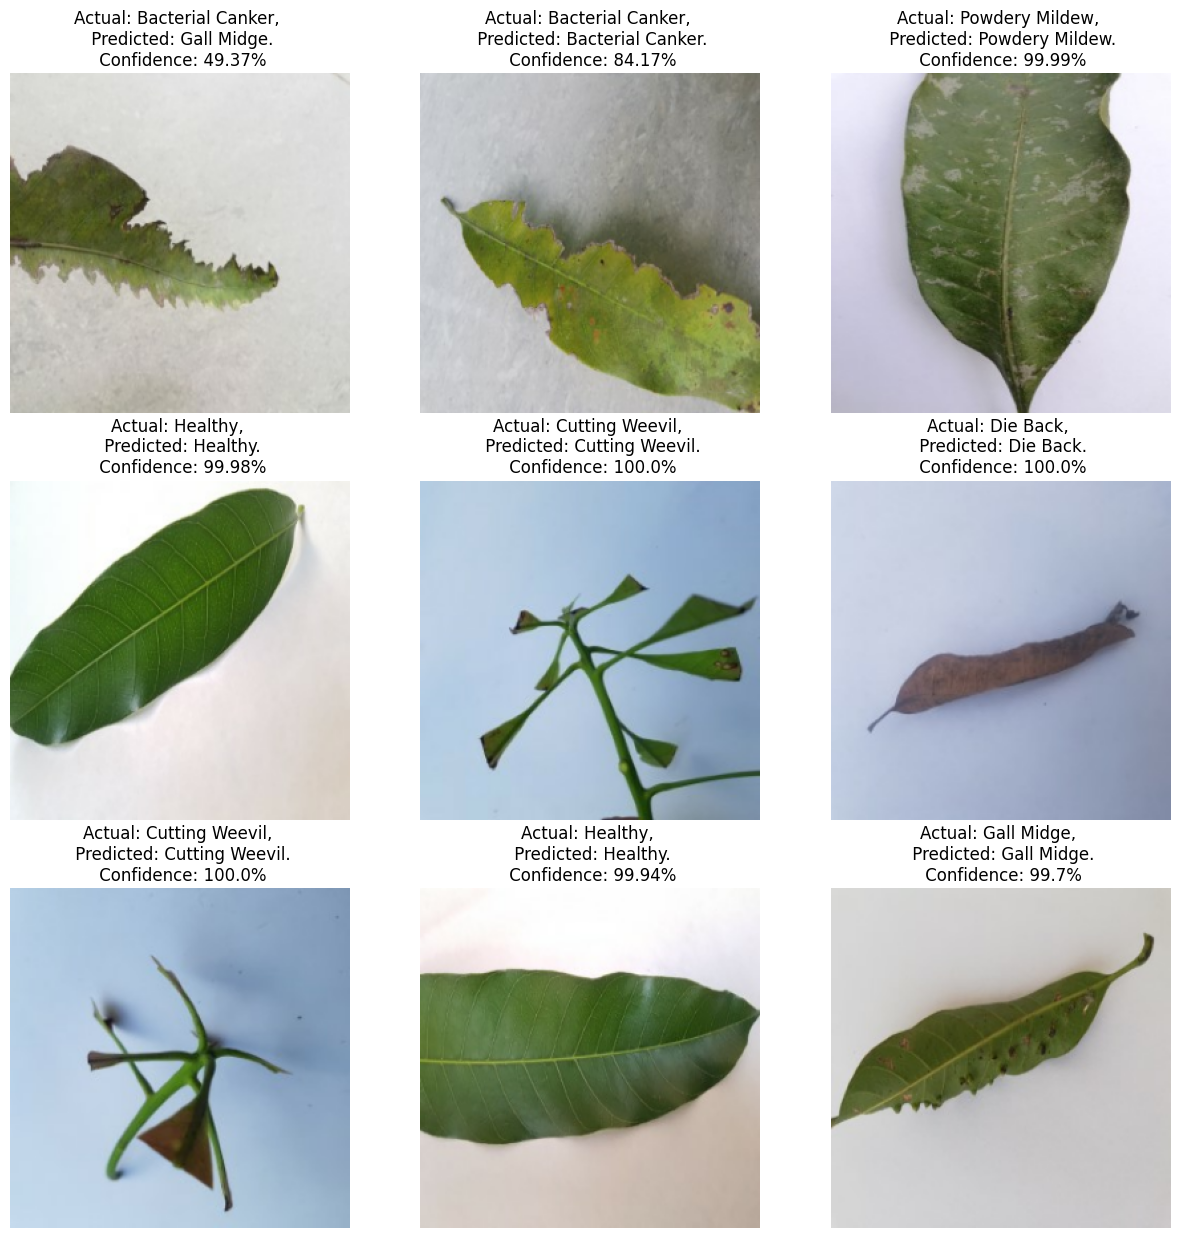

In [68]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take (1):
    for i in range (9):
        ax=plt.subplot (3,3,i+1)
        plt.imshow(images [i].numpy().astype("uint8"))
        predicted_class, confidence=predict (model, images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title (f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [39]:
# Define the input shape for the model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Define the number of classes in the dataset
n_classes = 8

# Define the Sequential model and add layers to it
model = models.Sequential([
    # Preprocessing layers
    resize_and_rescale,
    data_augmentation,
    
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten layer
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model with the input shape
model.build(input_shape)




In [40]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [41]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
#train the model
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/50
100/100 [==============================] - 184s 2s/step - loss: 1.7676 - accuracy: 0.2741 - val_loss: 1.4692 - val_accuracy: 0.3620
Epoch 2/50
100/100 [==============================] - 187s 2s/step - loss: 1.1665 - accuracy: 0.5537 - val_loss: 0.7150 - val_accuracy: 0.7266
Epoch 3/50
100/100 [==============================] - 219s 2s/step - loss: 0.8290 - accuracy: 0.6966 - val_loss: 0.6553 - val_accuracy: 0.7422
Epoch 4/50
100/100 [==============================] - 207s 2s/step - loss: 0.5792 - accuracy: 0.7856 - val_loss: 0.3867 - val_accuracy: 0.9062
Epoch 5/50
100/100 [==============================] - 203s 2s/step - loss: 0.4780 - accuracy: 0.8303 - val_loss: 0.2366 - val_accuracy: 0.9167
Epoch 6/50
100/100 [==============================] - 213s 2s/step - loss: 0.4307 - accuracy: 0.8447 - val_loss: 0.3240 - val_accuracy: 0.8646
Epoch 7/50
100/100 [==============================] - 207s 2s/step - loss: 0.3680 - accuracy: 0.8706 - val_loss: 0.1734 - val_accuracy: 0.9453

KeyboardInterrupt: 

In [43]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [44]:
# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=val_ds
)

Epoch 1/50
100/100 [==============================] - 203s 2s/step - loss: 0.1314 - accuracy: 0.9544 - val_loss: 0.0970 - val_accuracy: 0.9583
Epoch 2/50
100/100 [==============================] - 240s 2s/step - loss: 0.2041 - accuracy: 0.9341 - val_loss: 0.1324 - val_accuracy: 0.9453
Epoch 3/50
100/100 [==============================] - 232s 2s/step - loss: 0.1496 - accuracy: 0.9522 - val_loss: 0.0875 - val_accuracy: 0.9818


In [45]:
#evaluate the model
scores=model.evaluate(test_ds)

13/13 [==============================] - 8s 414ms/step - loss: 0.0911 - accuracy: 0.9760


In [46]:
scores

[0.09107844531536102, 0.9759615659713745]

In [47]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [50]:
acc,val_acc,loss,val_loss

([0.9543750286102295, 0.9340624809265137, 0.9521874785423279],
 [0.9583333134651184, 0.9453125, 0.9817708134651184],
 [0.13143394887447357, 0.20407186448574066, 0.1496373414993286],
 [0.09697782248258591, 0.1323721557855606, 0.08752540498971939])

In [52]:
history

In [53]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 100}


In [54]:
history.history['accuracy']

[0.9543750286102295, 0.9340624809265137, 0.9521874785423279]

In [55]:
len(history.history['accuracy'])

3

In [56]:
val=len(history.history['accuracy'])

In [57]:
val


3

Text(0.5, 1.0, 'Training and Validation Loss')

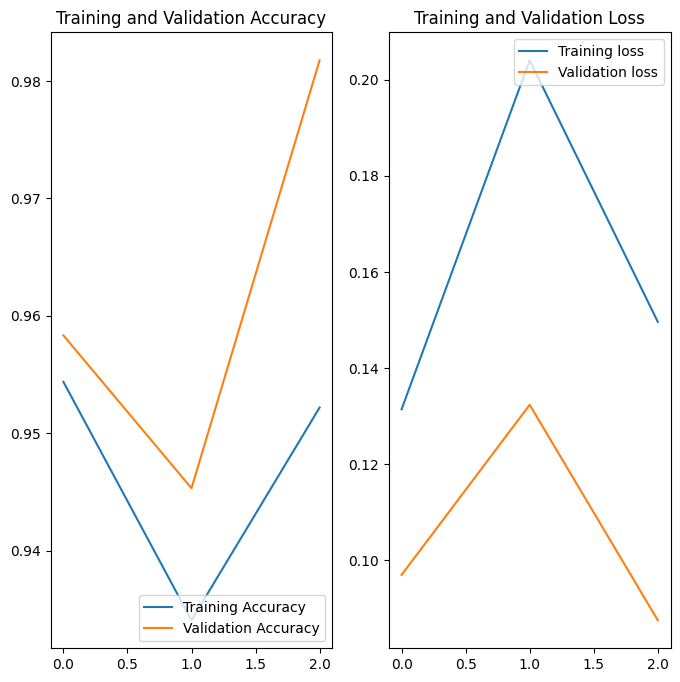

In [58]:
#Plotting Accuracy and Loss Graph for Trained Model using Matplotlib with History Callback
#ploting training and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot (1,2,1)
plt.plot(range (val), acc, label='Training Accuracy')
plt.plot(range (val), val_acc, label='Validation Accuracy')
plt.legend (loc='lower right')
plt.title('Training and Validation Accuracy')


#ploting training and validation Loss.
plt.subplot (1,2,2)
plt.plot(range (val), loss, label='Training loss')
plt.plot(range (val), val_loss, label='Validation loss')
plt.legend (loc='upper right')
plt.title('Training and Validation Loss')